In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gspread
import streamlit as st
from google.oauth2.service_account import Credentials

In [7]:
# 1. Define el scope y crea las credenciales (usando secrets si estás en Streamlit Cloud)
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/spreadsheets",
         "https://www.googleapis.com/auth/drive", "https://www.googleapis.com/auth/drive.file"]

In [9]:
# Arreglar clave privada si viene como string con saltos reales
key_info = dict(st.secrets["gcp_service_account"])
key_info["private_key"] = key_info["private_key"].replace("\\n", "\n") if "\\n" in key_info["private_key"] else key_info["private_key"]

In [10]:
# Desde secrets (recomendado para Streamlit Cloud)
creds = Credentials.from_service_account_info(st.secrets["gcp_service_account"], scopes=scope)

In [11]:
# 2. Autenticación y conexión al Google Sheet
client = gspread.authorize(creds)

In [12]:
# 3. Abre el Google Sheet por su nombre (también puedes usar su URL o ID)
spreadsheet = client.open("Planning_Tracker_VSP")

In [13]:
# 4. Selecciona la hoja "Transferencias"
worksheet = spreadsheet.worksheet("Eventos")

In [17]:
# 5. Convierte el contenido en DataFrame
data = worksheet.get_all_records()  # devuelve una lista de diccionarios
data_vsp = pd.DataFrame(data)

In [18]:
data_vsp

,Evento,PAX,€ PAX,Ingreso Est. €,Gasto Est. €,Margen Est. €,Factura,Cobros,Pagos,Margen (G),...,Fecha evento,DS,Lugar evento,Cliente Final,Esfuerzo,Contacto,Actividad,Semana,Mes,Año
0,Faunia-UCI-iPad Challenge-3/10/2023,150,"19,3 €","2.890,0 €","1.122,0 €",1.768 €,,"2.865,9 €","0,0 €","2865,9 €",...,3/10/2023,mar,Faunia,UCI,Normal,Melina,iPad Challenge,40,10,2023
1,CIL-María José-Mariachi-8/10/2023,40,"18,0 €","720,0 €","630,0 €",90 €,,"0,0 €","0,0 €",0 €,...,8/10/2023,dom,Masía José Luis,María José,Normal,María José,Mariachi,41,10,2023
2,TIQETS--Espectáculo flamenco-18/10/2023,200,"21,5 €","4.300,0 €","2.580,0 €",1.720 €,,"0,0 €","0,0 €",0 €,...,18/10/2023,mié,FIBES Sevilla,TIQETS,Normal,Teresa Broccoli,Espectáculo flamenco,42,10,2023
3,Kaizen-Caetano Retail-iPad Challenge-20/10/2023,60,"71,9 €","4.311,0 €","1.828,0 €",2.483 €,,"4.311,0 €","0,0 €",4311 €,...,20/10/2023,vie,Madrid,Caetano Retail,Normal,Luis López,iPad Challenge,42,10,2023
4,CITITRAVEL-Astellas-iPad Challenge-24/10/2023,32,"40,5 €","1.296,0 €","358,0 €",938 €,,"0,0 €","0,0 €",0 €,...,24/10/2023,mar,Madrid,Astellas,Normal,Carlos Rosa,iPad Challenge,43,10,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Campamento Roma ENDESA -AMEX-Endesa-2025-07-13,20,"0,0 €",,,,,"0,0 €","0,0 €",0 €,...,2025-07-13,mar,Roma,Endesa,Normal,María Cristóbal,,29,7,2025
113,iPad Challenge interactivo 400 pax -Kaizen--20...,400,"0,0 €",,,,,"0,0 €","0,0 €",0 €,...,2025-09-19,lun,Madrid,,Normal,Luis López,iPad Challenge,38,9,2025
114,DJ + entertainment cena gala -BUZZ--2025-09-24,400,"0,0 €",,,,,"0,0 €","0,0 €",0 €,...,2025-09-24,mié,Madrid,,Normal,Milou Van Gerwen,entretenimientos para evento,39,9,2025
115,ruta de tapas Madrid 16 junio -PRESSTOUR-Abbot...,20,"0,0 €",,,,,"0,0 €","0,0 €",0 €,...,2025-06-16,dom,Madrid,Abbott,Normal,Talía Ulloa,Ruta de Tapas,25,6,2025


In [22]:
data_vsp.columns

Index(['evento', 'pax', '€ pax ', 'ingreso est. €', 'gasto est. €',
       'margen est. €', 'factura', 'cobros', 'pagos', 'margen (g)',
       'cliente vsp', 'tipo actividad', 'fecha evento', 'ds', 'lugar evento',
       'cliente final', 'esfuerzo', 'contacto', 'actividad', 'semana', 'mes',
       'año'],
      dtype='object')

In [20]:
data_vsp.columns = data_vsp.columns.str.lower()

In [21]:
data_vsp = data_vsp[['tipo actividad', 'fecha evento', 'cliente vsp', 'cliente final',
       'estado negociación', 'hora inicio', 'hora final',
        'fecha contacto', 'lugar evento',  'idioma', 'pax', 'pax €',
       'ingreso est. €', 'gasto est. €', 'margen est. €',
       'cobros', 'pagos', 'margen (g)', 'esfuerzo']]
data_vsp

KeyError: "['estado negociación', 'hora inicio', 'hora final', 'fecha contacto', 'idioma', 'pax €'] not in index"

In [686]:
data_vsp.columns = data_vsp.columns.str.replace("€", "eur")
data_vsp.columns = data_vsp.columns.str.replace(".", "")
data_vsp.columns = data_vsp.columns.str.replace(" (g)", "")
data_vsp.columns = data_vsp.columns.str.replace(" / ", " ")
data_vsp.columns = data_vsp.columns.str.replace(" ", "_")

In [687]:
data_vsp = data_vsp.dropna(subset="cliente_vsp")

In [688]:
data_vsp = data_vsp[data_vsp["estado_negociación"] != "Rechazado"]

In [689]:
# Primero, aseguramos que las fechas están en el formato adecuado
data_vsp['fecha_evento'] = pd.to_datetime(data_vsp['fecha_evento'], format='%d/%m/%Y', errors='coerce')

In [690]:
# Convertir la fecha de contacto a formato datetime
data_vsp['fecha_contacto'] = pd.to_datetime(data_vsp['fecha_contacto'], format='%d/%m/%Y', errors='coerce')

In [691]:
# Reemplazar valores NA en las columnas específicas
data_vsp["tipo_actividad"].fillna("Otros", inplace=True)
data_vsp["cliente_final"].fillna("Desconocido", inplace=True)
data_vsp["lugar_evento"].fillna("Desconocido", inplace=True)

In [692]:
# Filtrar las filas con el año 2024
data_vsp = data_vsp[data_vsp['fecha_evento'].dt.year == 2024]

In [693]:
data_vsp.isna().sum()

tipo_actividad         0
fecha_evento           0
cliente_vsp            0
cliente_final          0
estado_negociación     0
hora_inicio            7
hora_final             7
fecha_contacto         5
lugar_evento           0
idioma                 0
pax                   10
pax_eur                1
ingreso_est_eur        7
gasto_est_eur         10
margen_est_eur         0
cobros                 0
pagos                  0
margen                 0
esfuerzo               0
dtype: int64

In [694]:
# Calcular la diferencia en días entre 'fecha_evento' y 'fecha_contacto'
data_vsp['dias_hasta_evento'] = (data_vsp['fecha_evento'] - data_vsp['fecha_contacto']).dt.days

In [695]:
# Eliminar el símbolo " €" y convertir los valores a tipo float
data_vsp[['pax_eur','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \
    data_vsp[['pax_eur', 'ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']].replace(" €", "", regex=True)


In [696]:
# Convertir las columnas a tipo string antes de aplicar el reemplazo
data_vsp[['pax_eur','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \
    data_vsp[['pax_eur','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']].astype(str)

# Eliminar el separador de miles (el punto)
data_vsp[['pax_eur','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \
    data_vsp[['pax_eur','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']].replace({"\.": ""}, regex=True)

# Cambiar las comas por puntos (para convertir a formato decimal)
data_vsp[['pax_eur','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']] = \
    data_vsp[['pax_eur','ingreso_est_eur', 'gasto_est_eur', 'margen_est_eur', 'cobros', 'pagos', 'margen']].replace({",": "."}, regex=True)

In [697]:
data_vsp.head()

,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,estado_negociación,hora_inicio,hora_final,fecha_contacto,lugar_evento,idioma,pax,pax_eur,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,dias_hasta_evento
22,Visita Museo + Cena,2024-01-10,AMEX,Pfizer,100% pagado,19:00,23:30,2023-12-15,Madrid,ES,70.0,175.8,12306.7,nan,2143,9931.3,-6929.3,3002.1,Mucho,26.0
26,Material,2024-01-16,SASSOT SOUND,Desconocido,100% pagado,NaN,NaN,2024-01-12,Madrid,EN,23.0,nan,nan,nan,148,500.9,-254.4,246.6,Normal,4.0
27,Indoor iPad Challenge,2024-01-19,AMEX,AstraZeneca,100% pagado,11:30,13:30,2023-12-20,Toledo,ES,19.0,61.8,1175.0,nan,1175,1123.2,-300.1,823.1,Mucho,30.0
30,Arcades,2024-01-24,Q4Y,Ingenico,100% pagado,18:30,21:00,2023-12-05,Madrid,EN,150.0,6.7,1000.0,nan,550,955.9,-430.2,525.7,Normal,50.0
33,Amenización Cena,2024-01-30,ASEAMAC,ASEAMAC,100% pagado,20:30,22:30,2023-11-17,Madrid,ES,NaN,0.0,nan,nan,650,2028.6,-1231.0,797.6,Normal,74.0


In [698]:


# Convertir horas
data_vsp["hora_inicio"] = pd.to_datetime(data_vsp["hora_inicio"], format="%H:%M", errors="coerce").dt.time
data_vsp["hora_final"] = pd.to_datetime(data_vsp["hora_final"], format="%H:%M", errors="coerce").dt.time

# Convertir categóricas
data_vsp["estado_negociación"] = data_vsp["estado_negociación"].astype("category")
data_vsp["tipo_actividad"] = data_vsp["tipo_actividad"].astype("category")
data_vsp["esfuerzo"] = data_vsp["esfuerzo"].astype("category")

# Convertir numéricas
data_vsp["pax"] = pd.to_numeric(data_vsp["pax"], errors="coerce").fillna(0).astype(int)
data_vsp["pax_eur"] = pd.to_numeric(data_vsp["pax_eur"], errors="coerce")
data_vsp["ingreso_est_eur"] = pd.to_numeric(data_vsp["ingreso_est_eur"], errors="coerce")
data_vsp["gasto_est_eur"] = pd.to_numeric(data_vsp["gasto_est_eur"], errors="coerce")
data_vsp["margen_est_eur"] = pd.to_numeric(data_vsp["margen_est_eur"], errors="coerce")
data_vsp["cobros"] = pd.to_numeric(data_vsp["cobros"], errors="coerce")
data_vsp["pagos"] = pd.to_numeric(data_vsp["pagos"], errors="coerce")
data_vsp["margen"] = pd.to_numeric(data_vsp["margen"], errors="coerce")

# Verificar cambios
print(data_vsp.dtypes)


tipo_actividad              category
fecha_evento          datetime64[ns]
cliente_vsp                   object
cliente_final                 object
estado_negociación          category
hora_inicio                   object
hora_final                    object
fecha_contacto        datetime64[ns]
lugar_evento                  object
idioma                        object
pax                            int32
pax_eur                      float64
ingreso_est_eur              float64
gasto_est_eur                float64
margen_est_eur                 int64
cobros                       float64
pagos                        float64
margen                       float64
esfuerzo                    category
dias_hasta_evento            float64
dtype: object


In [699]:
data_vsp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 22 to 233
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tipo_actividad      69 non-null     category      
 1   fecha_evento        69 non-null     datetime64[ns]
 2   cliente_vsp         69 non-null     object        
 3   cliente_final       69 non-null     object        
 4   estado_negociación  69 non-null     category      
 5   hora_inicio         55 non-null     object        
 6   hora_final          55 non-null     object        
 7   fecha_contacto      64 non-null     datetime64[ns]
 8   lugar_evento        69 non-null     object        
 9   idioma              69 non-null     object        
 10  pax                 69 non-null     int32         
 11  pax_eur             68 non-null     float64       
 12  ingreso_est_eur     62 non-null     float64       
 13  gasto_est_eur       59 non-null     float64       
 14 

In [700]:
data_vsp.sample(10)

,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,estado_negociación,hora_inicio,hora_final,fecha_contacto,lugar_evento,idioma,pax,pax_eur,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,dias_hasta_evento
210,Taller de Percusión,2024-11-21,AMEX,Endesa,100% pagado,15:30:00,17:30:00,2024-10-17,Mirador del Olivar,ES,100,33.9,3393.0,2500.0,893,3900.0,-2500.0,1400.0,Normal,35.0
185,Varias Propuestas,2024-10-23,AMEX,AstraZeneca,100% pagado,11:00:00,00:00:00,2024-08-05,Salamanca,ES,14,224.6,3145.1,1872.5,1273,3615.0,-1750.0,1865.0,Normal,79.0
152,Animador infantil,2024-09-14,AMEX,Johnson & Johnson,100% pagado,10:30:00,13:30:00,2024-07-18,Alcobendas,ES,50,9.4,469.8,320.0,150,540.0,-388.2,151.8,Normal,58.0
132,Campamento Endesa,2024-07-07,AMEX,Endesa,100% pagado,NaT,NaT,2024-02-27,Italia,ES,19,199.4,3788.9,3186.3,603,4355.0,-3026.2,1328.8,Poco,131.0
103,Tour Guiado,2024-06-05,AMEX,Pfizer,100% pagado,16:30:00,18:30:00,2024-05-20,Palacio Real,EN,10,41.9,419.1,312.5,107,0.0,-134.3,-134.3,Poco,16.0
195,Ruta de Tapas,2024-10-31,BUZZ,UNIQUEWORLD,100% pagado,11:30:00,14:30:00,2024-09-19,Madrid,EN,12,56.8,681.3,444.5,237,999.0,-633.7,365.3,Normal,42.0
102,Tour Guiado,2024-06-04,AMEX,Pfizer,100% pagado,17:30:00,19:30:00,2024-05-20,Museo Prado,EN,10,39.3,392.5,325.0,68,882.5,-571.9,310.5,Poco,15.0
68,Coordinador Freelances,2024-04-18,W2M,STRATA,100% pagado,09:00:00,15:30:00,NaT,Hotel Hilton,ES,0,0.0,454.5,40.0,415,22.8,-62.9,-40.1,Normal,NaN
211,Amenización Cena,2024-11-21,BUZZ,Desconocido,100% pagado,20:00:00,22:30:00,2024-11-13,Madrid,ES,0,0.0,1170.0,800.0,370,1170.0,-805.2,364.8,Normal,8.0
156,iPad Challenge,2024-09-14,Mundo Hispánico,Descudet,100% pagado,15:15:00,17:15:00,2024-01-30,Madrid,FR,24,54.6,1310.0,230.3,1080,1310.0,-463.4,846.6,Normal,228.0


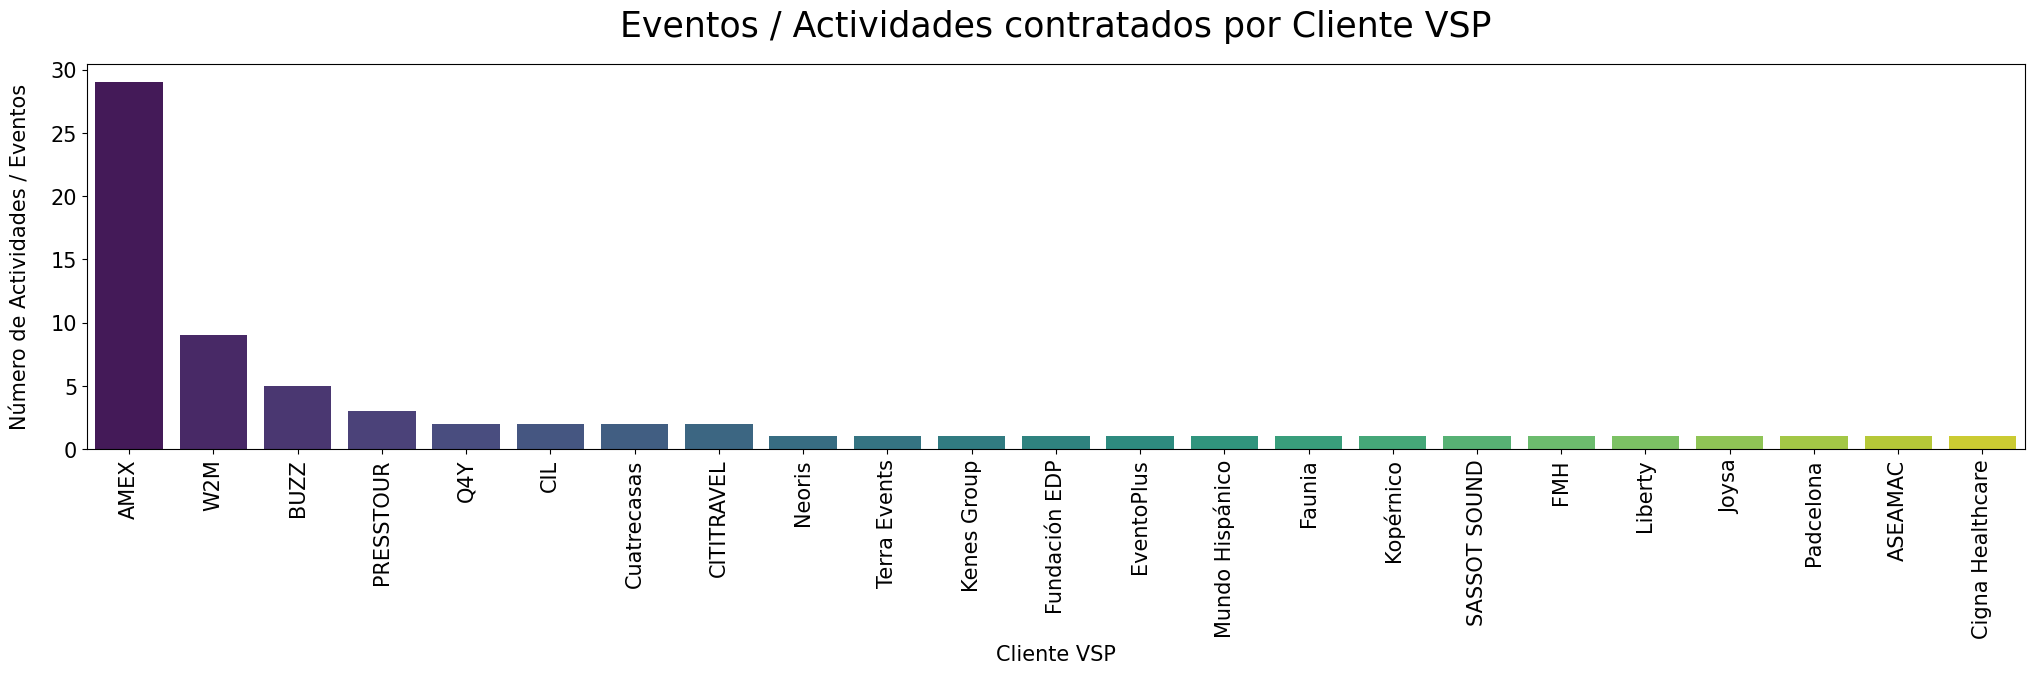

In [701]:
# Count occurrences and sort from highest to lowest
client_counts = data_vsp["cliente_vsp"].value_counts()

fig, ax = plt.subplots(figsize=(25, 5))

# Use barplot to display sorted counts
sns.barplot(x=client_counts.index, y=client_counts.values, palette="viridis")

plt.xlabel("Cliente VSP", size=15)
plt.ylabel("Número de Actividades / Eventos", size=15, labelpad=15)
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.title("Eventos / Actividades contratados por Cliente VSP", size=25, pad=20)

plt.show()


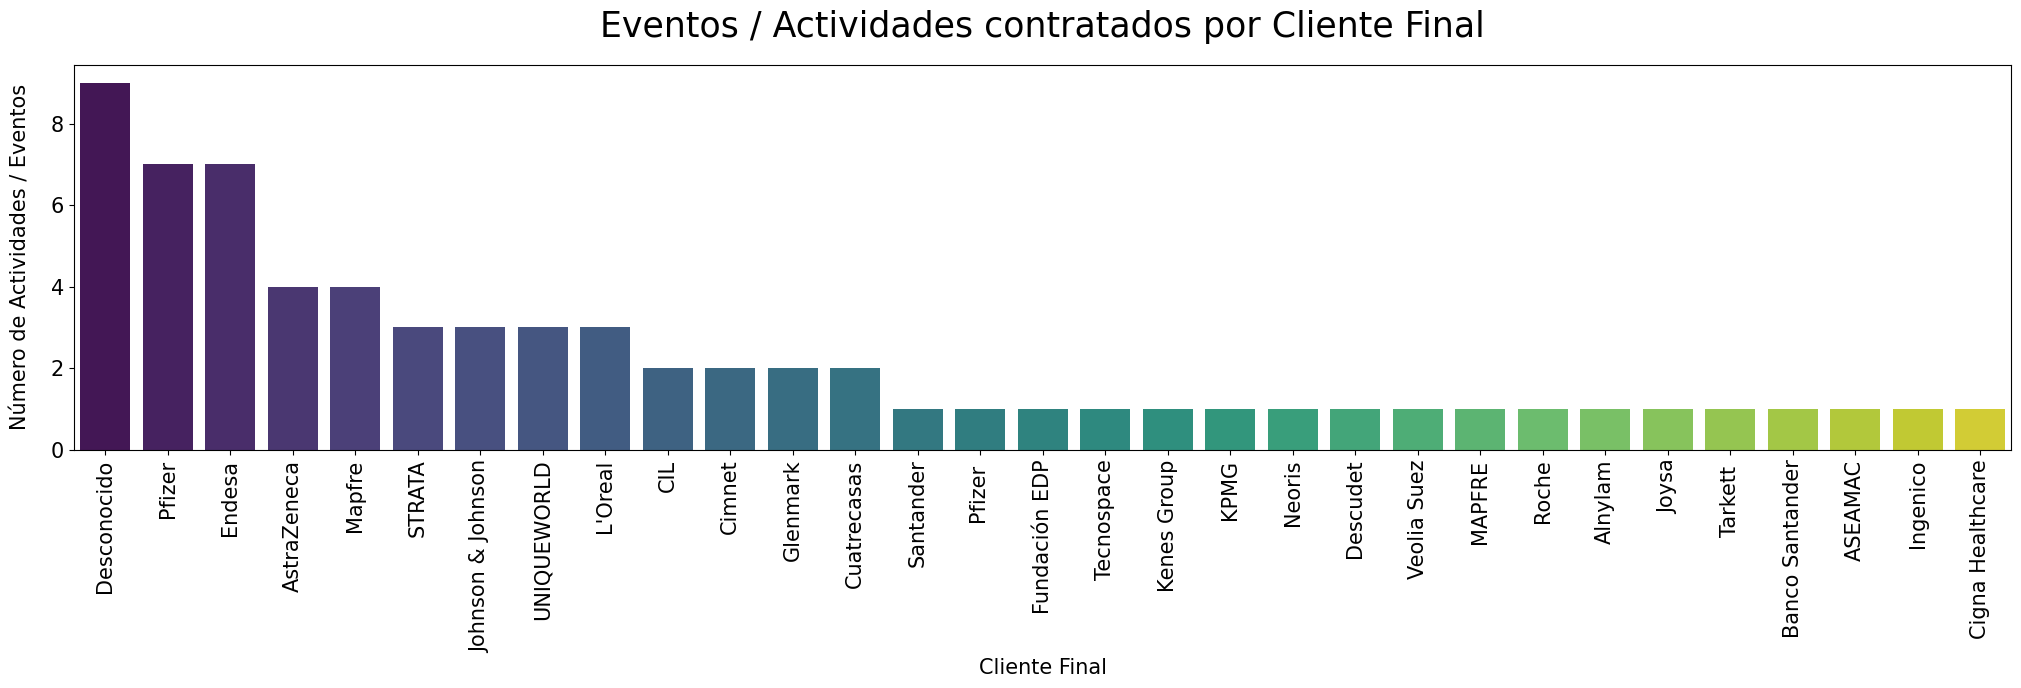

In [702]:
# Count occurrences and sort from highest to lowest
client_counts = data_vsp["cliente_final"].value_counts()

fig, ax = plt.subplots(figsize=(25, 5))

# Use barplot to display sorted counts
sns.barplot(x=client_counts.index, y=client_counts.values, palette="viridis")

plt.xlabel("Cliente Final", size=15)
plt.ylabel("Número de Actividades / Eventos", size=15, labelpad=15)
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.title("Eventos / Actividades contratados por Cliente Final", size=25, pad=20)

plt.show()


In [703]:
# Extraer mes y año de 'fecha_evento'
data_vsp['mes_ano'] = data_vsp['fecha_evento'].dt.to_period('M')

In [704]:
# Agrupar por mes/año y sumar ingresos y gastos
ingresos_gastos = data_vsp.groupby('mes_ano')[['pagos', 'cobros', 'margen']].sum()

In [705]:
data_vsp.head()

,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,estado_negociación,hora_inicio,hora_final,fecha_contacto,lugar_evento,idioma,...,pax_eur,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,dias_hasta_evento,mes_ano
22,Visita Museo + Cena,2024-01-10,AMEX,Pfizer,100% pagado,19:00:00,23:30:00,2023-12-15,Madrid,ES,...,175.8,12306.7,NaN,2143,9931.3,-6929.3,3002.1,Mucho,26.0,2024-01
26,Material,2024-01-16,SASSOT SOUND,Desconocido,100% pagado,NaT,NaT,2024-01-12,Madrid,EN,...,NaN,NaN,NaN,148,500.9,-254.4,246.6,Normal,4.0,2024-01
27,Indoor iPad Challenge,2024-01-19,AMEX,AstraZeneca,100% pagado,11:30:00,13:30:00,2023-12-20,Toledo,ES,...,61.8,1175.0,NaN,1175,1123.2,-300.1,823.1,Mucho,30.0,2024-01
30,Arcades,2024-01-24,Q4Y,Ingenico,100% pagado,18:30:00,21:00:00,2023-12-05,Madrid,EN,...,6.7,1000.0,NaN,550,955.9,-430.2,525.7,Normal,50.0,2024-01
33,Amenización Cena,2024-01-30,ASEAMAC,ASEAMAC,100% pagado,20:30:00,22:30:00,2023-11-17,Madrid,ES,...,0.0,NaN,NaN,650,2028.6,-1231.0,797.6,Normal,74.0,2024-01


In [706]:
data_vsp["pagos"] = data_vsp["pagos"].abs()
data_vsp["gasto_est_eur"] = data_vsp["gasto_est_eur"].abs()

In [707]:
ingresos_gastos

,pagos,cobros,margen
mes_ano,,,
2024-01,-9145.0,14539.9,5395.1
2024-02,-2717.9,6299.0,3581.1
2024-03,-13970.2,18404.6,4434.4
2024-04,-17228.8,24309.3,7080.5
2024-05,-5036.8,9425.0,4388.2
2024-06,-7532.4,11321.3,3788.8
2024-07,-4350.2,8005.0,3654.8
2024-09,-5034.3,11581.5,6547.2
2024-10,-5686.5,11904.6,6218.1


In [708]:
ingresos_gastos.index = ingresos_gastos.index.to_timestamp()

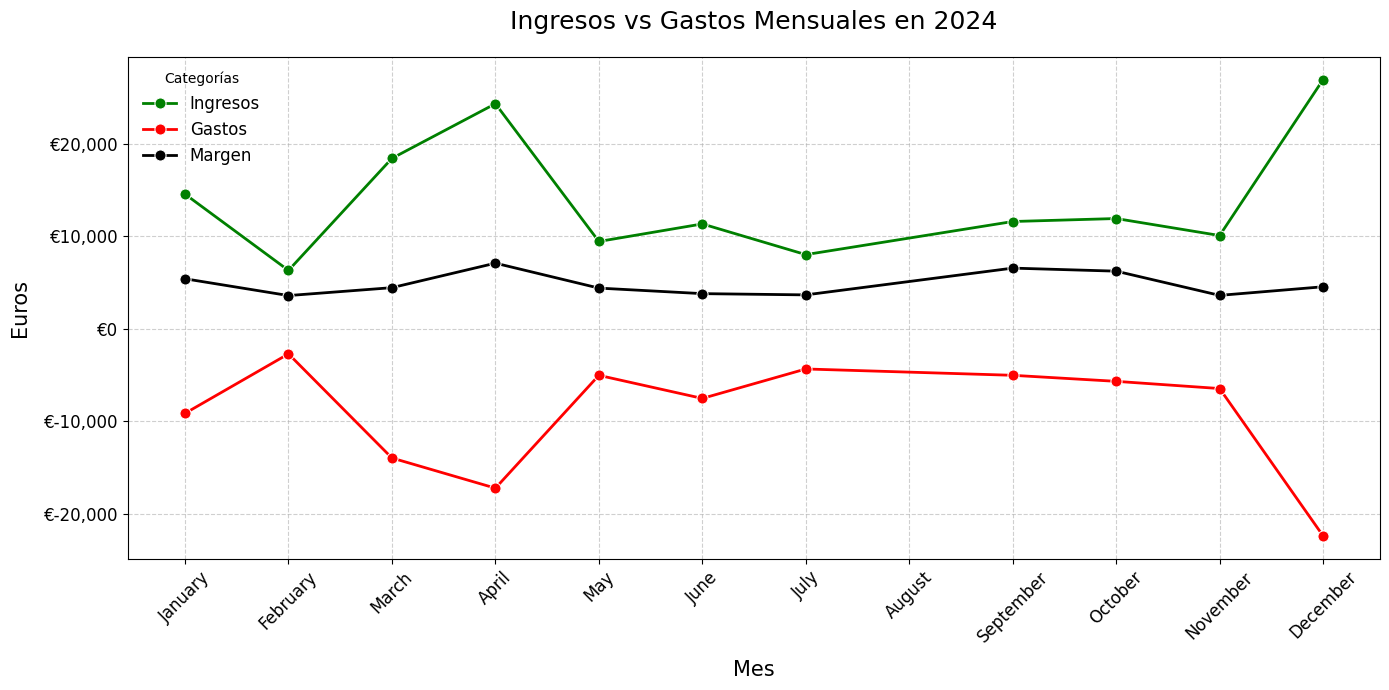

In [709]:
# Crear un rango de meses para 2024
meses = pd.date_range('2024-01-01', '2024-12-01', freq='MS').month_name()

# Asegurarnos de que los datos tengan un índice de fechas para cada mes
ingresos_gastos['month_name'] = ingresos_gastos.index.month_name()

# Reindexar el DataFrame para incluir todos los meses de 2024
ingresos_gastos = ingresos_gastos.set_index('month_name').reindex(meses, fill_value=np.nan)

# Configurar el gráfico
plt.figure(figsize=(14, 7))

# Ingresos
sns.lineplot(data=ingresos_gastos, x=ingresos_gastos.index, y='cobros', 
             label='Ingresos', marker='o', color='green', linewidth=2, markersize=8)

# Gastos
sns.lineplot(data=ingresos_gastos, x=ingresos_gastos.index, y='pagos', 
             label='Gastos', marker='o', color='red', linewidth=2, markersize=8)

# Margen
sns.lineplot(data=ingresos_gastos, x=ingresos_gastos.index, y='margen', 
             label='Margen', marker='o', color='black', linewidth=2, markersize=8)

# Mejorar la visualización
plt.xlabel('Mes', size=15, labelpad=10)
plt.ylabel('Euros', size=15, labelpad=10)
plt.title('Ingresos vs Gastos Mensuales en 2024', size=18, pad=20)

# Ajustes para las etiquetas del eje X
plt.xticks(rotation=45, size=12)

# Establecer los nombres de los meses como etiquetas del eje X
plt.xticks(ticks=range(len(meses)), labels=meses, rotation=45, size=12)

# Formatear el eje Y con símbolo de euro
plt.yticks(size=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'€{x:,.0f}'))

# Cuadrícula y transparencia
plt.grid(True, linestyle='--', alpha=0.6)

# Leyenda
plt.legend(title='Categorías', loc='upper left', fontsize=12, frameon=False)

# Asegurarse de que todo encaje bien
plt.tight_layout()

# Mostrar el gráfico
plt.show()


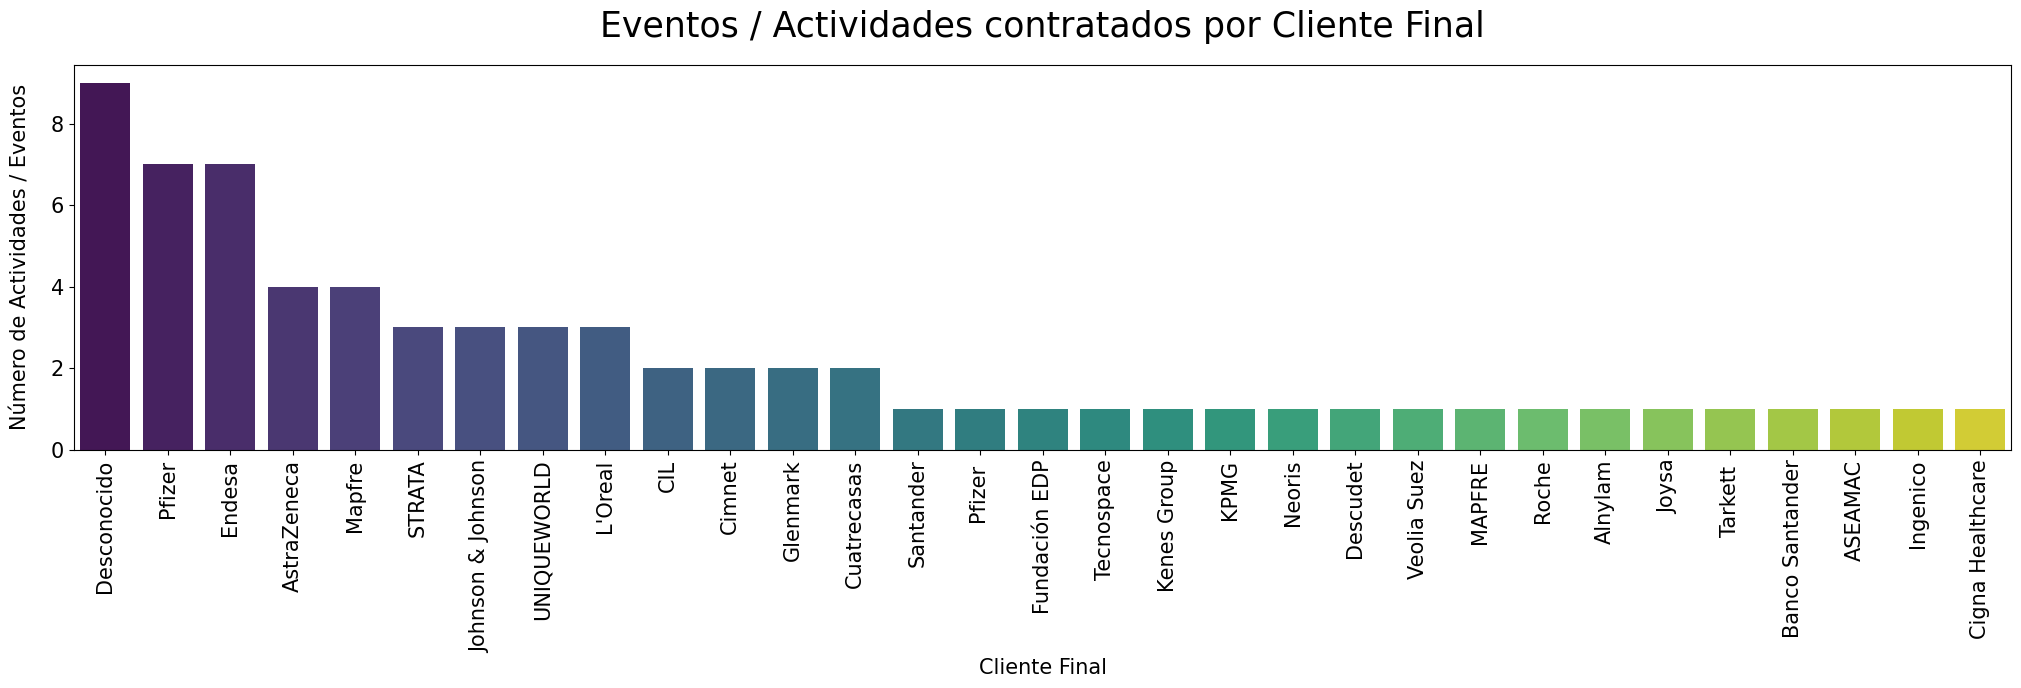

In [710]:
# Count occurrences and sort from highest to lowest
client_counts = data_vsp["cliente_final"].value_counts()

fig, ax = plt.subplots(figsize=(25, 5))

# Use barplot to display sorted counts
sns.barplot(x=client_counts.index, y=client_counts.values, palette="viridis")

plt.xlabel("Cliente Final", size=15)
plt.ylabel("Número de Actividades / Eventos", size=15, labelpad=15)
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.title("Eventos / Actividades contratados por Cliente Final", size=25, pad=20)

plt.show()

In [711]:
# Agrupar los datos por tipo de actividad y sumar los valores de cobros, pagos y margen
actividad_summary = data_vsp.groupby('tipo_actividad')[['cobros', 'pagos', 'margen']].sum()

# Ordenar el DataFrame por la columna 'margen' en orden descendente
actividad_summary = actividad_summary.sort_values(by='margen', ascending=True)


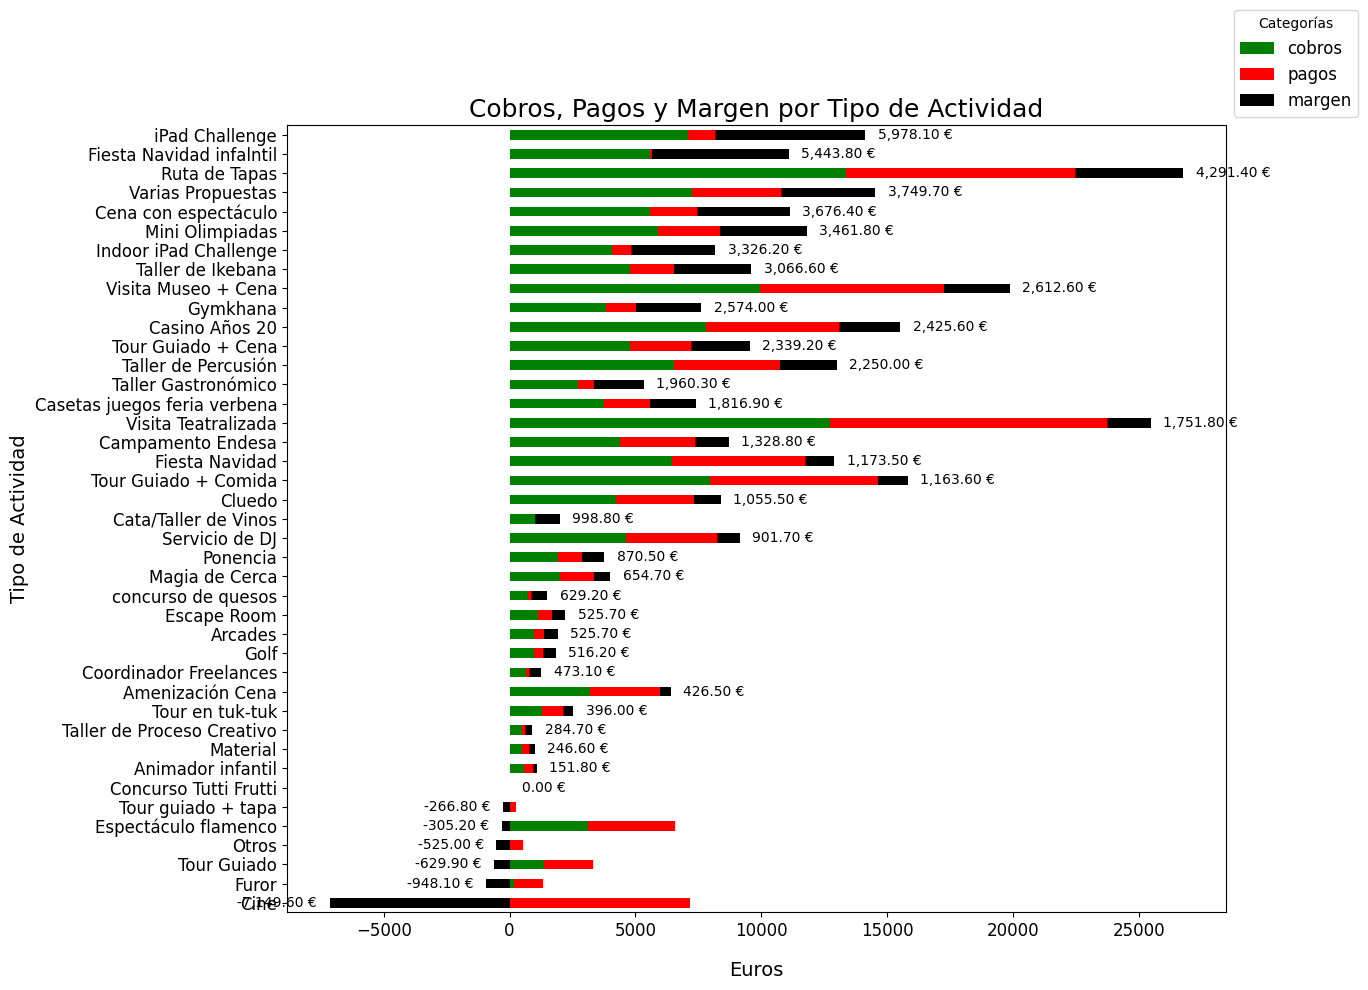

In [712]:
import matplotlib.pyplot as plt

# Create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Plot stacked horizontal bars
actividad_summary.plot(kind='barh', stacked=True, ax=ax, color=['green', 'red', 'black'])

# Improve visualization
plt.ylabel('Tipo de Actividad', size=14)
plt.xlabel('Euros', size=14, labelpad=15)
plt.title('Cobros, Pagos y Margen por Tipo de Actividad', size=18)
plt.xticks(size=12)
plt.yticks(size=12)

# Move the legend to top right outside of plot
plt.legend(title='Categorías', loc='lower right', fontsize=12, bbox_to_anchor=(1.15, 1))

# Add annotations for margin values, adjusting position dynamically
for p in ax.patches:
    if p.get_facecolor() == (0, 0, 0, 1):  # Black bars (margen)
        bar_value = p.get_width()  # Get margin value
        xpos = p.get_x() + bar_value  # Position relative to bar
        ypos = p.get_y() + p.get_height() / 2  # Center vertically
        
        # Adjust label position: right for positive, left for negative
        ha = 'left' if bar_value >= 0 else 'right'
        offset = 500 if bar_value >= 0 else -500  # Offset to avoid overlap
        
        ax.text(xpos + offset, ypos, f'{bar_value:,.2f} €', 
                ha=ha, va='center', fontsize=10, color='black')

# Improve layout
plt.tight_layout()
plt.show()


In [713]:
# Agrupar los datos por tipo de actividad y sumar los valores de cobros, pagos y margen
cliente_summary = data_vsp.groupby('cliente_vsp')[['cobros', 'pagos', 'margen']].sum()

# Ordenar el DataFrame por la columna 'margen' en orden descendente
cliente_summary = cliente_summary.sort_values(by='margen', ascending=True)

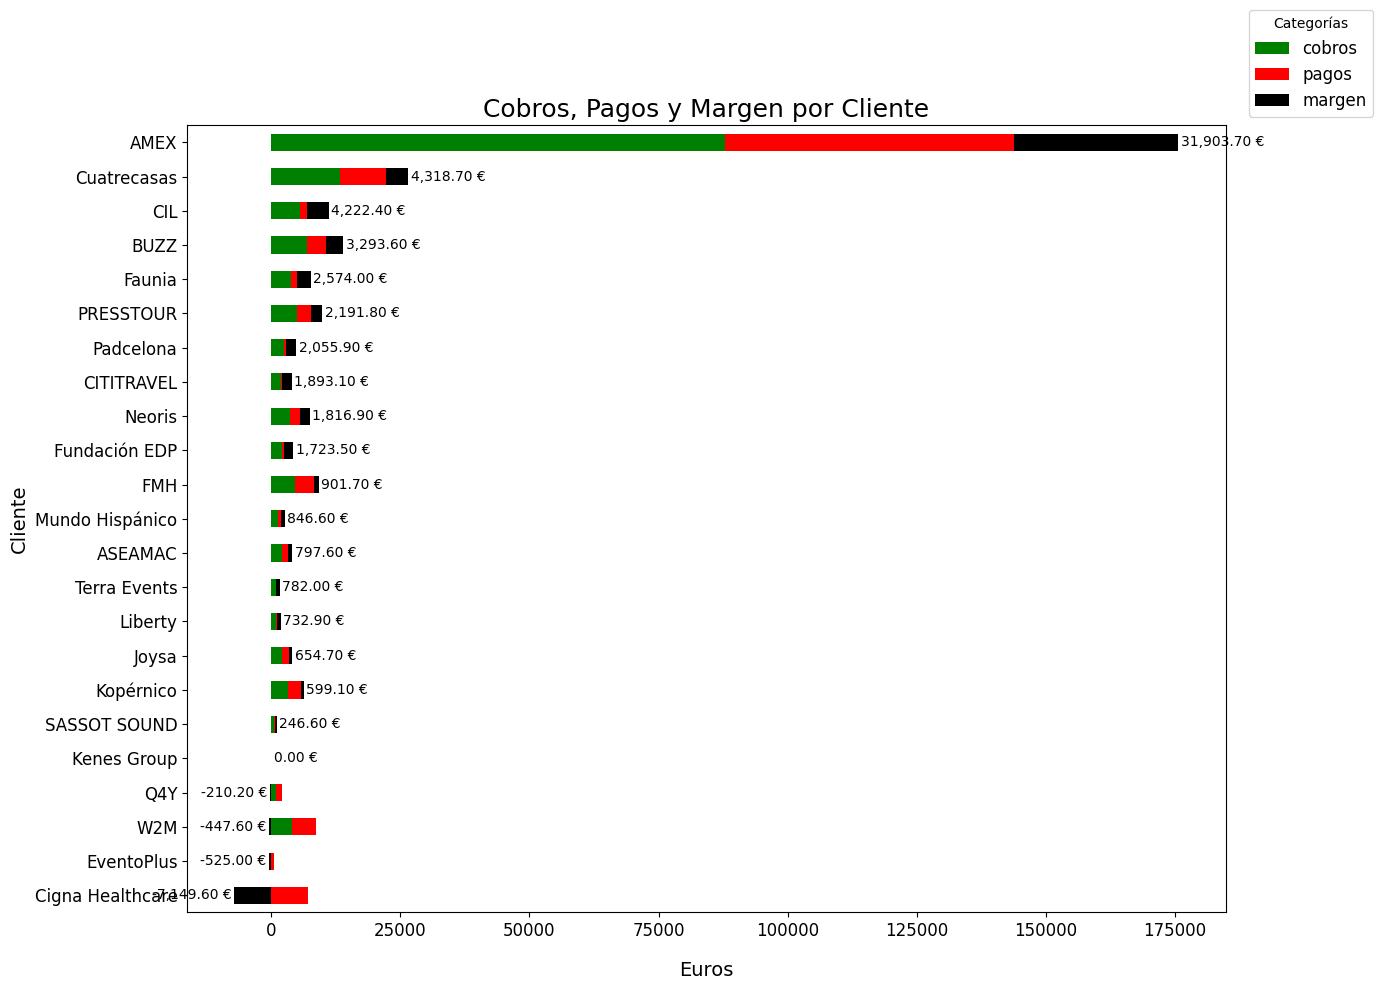

In [714]:
import matplotlib.pyplot as plt

# Create a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Plot stacked horizontal bars
cliente_summary.plot(kind='barh', stacked=True, ax=ax, color=['green', 'red', 'black'])

# Improve visualization
plt.ylabel('Cliente', size=14)
plt.xlabel('Euros', size=14, labelpad=15)
plt.title('Cobros, Pagos y Margen por Cliente', size=18)
plt.xticks(size=12)
plt.yticks(size=12)

# Move the legend to top right outside of plot
plt.legend(title='Categorías', loc='lower right', fontsize=12, bbox_to_anchor=(1.15, 1))

# Add annotations for margin values, adjusting position dynamically
for p in ax.patches:
    if p.get_facecolor() == (0, 0, 0, 1):  # Black bars (margen)
        bar_value = p.get_width()  # Get margin value
        xpos = p.get_x() + bar_value  # Position relative to bar
        ypos = p.get_y() + p.get_height() / 2  # Center vertically
        
        # Adjust label position: right for positive, left for negative
        ha = 'left' if bar_value >= 0 else 'right'
        offset = 500 if bar_value >= 0 else -500  # Offset to avoid overlap
        
        ax.text(xpos + offset, ypos, f'{bar_value:,.2f} €', 
                ha=ha, va='center', fontsize=10, color='black')

# Improve layout
plt.tight_layout()
plt.show()


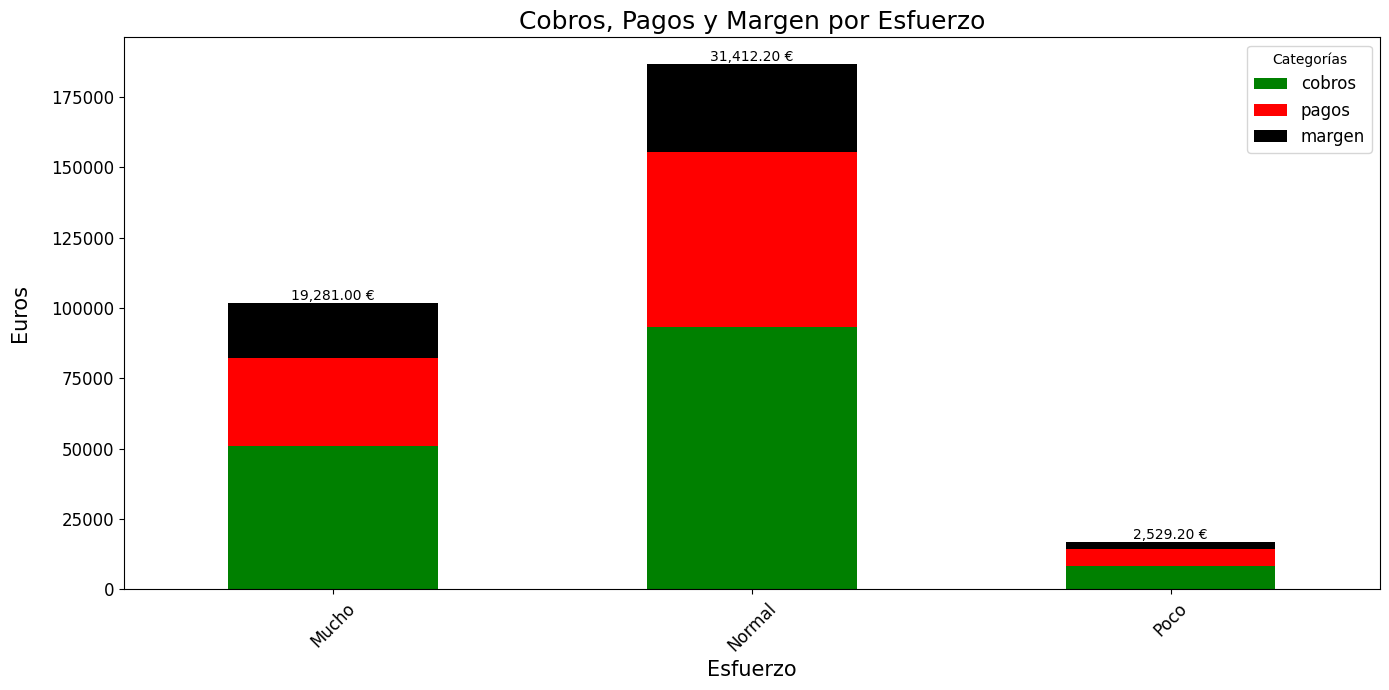

In [715]:
# Agrupar los datos por tipo de actividad y sumar los valores de cobros, pagos y margen
cliente_summary = data_vsp.groupby('esfuerzo')[['cobros', 'pagos', 'margen']].sum()

# Ordenar el DataFrame por la columna 'margen' en orden descendente
actividad_summary = cliente_summary.sort_values(by='margen', ascending=False)

# Crear el gráfico de barras apiladas
ax = cliente_summary.plot(kind='bar', stacked=True, figsize=(14, 7), color=['green', 'red', 'black'])

# Mejorar la visualización
plt.xlabel('Esfuerzo', size=15)
plt.ylabel('Euros', size=15, labelpad=15)
plt.title('Cobros, Pagos y Margen por Esfuerzo', size=18)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)

# Mover la leyenda a la esquina superior derecha
plt.legend(title='Categorías', loc='upper right', fontsize=12)

# Añadir anotaciones a las barras de margen
for p in ax.patches:
    # Obtener la altura de la barra (representa el valor acumulado)
    height = p.get_height()
    
    # Verificar si la barra corresponde al margen (color negro)
    if p.get_facecolor() == (0, 0, 0, 1):  # Color negro en formato RGBA
        # Obtener la posición X de la barra (es la misma para todas las barras apiladas)
        x = p.get_x() + p.get_width() / 2
        
        # Colocar la anotación encima de la barra de margen
        ax.text(x, p.get_y() + height + 10, f'{height:,.2f} €', ha='center', va='bottom', fontsize=10, color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Tiempo desde contacto a Evento

In [716]:
# Calcular la diferencia en días entre 'fecha_evento' y 'fecha_contacto'
data_vsp['dias_hasta_evento'] = (data_vsp['fecha_evento'] - data_vsp['fecha_contacto']).dt.days

In [717]:
# Filtrar las filas donde la fecha de contacto es posterior a la fecha de evento
eventos_incorrectos = data_vsp[data_vsp['fecha_contacto'] > data_vsp['fecha_evento']]

# Ver las filas con fecha de contacto posterior a la fecha del evento
eventos_incorrectos


,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,estado_negociación,hora_inicio,hora_final,fecha_contacto,lugar_evento,idioma,...,pax_eur,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,dias_hasta_evento,mes_ano


In [718]:
data_vsp.head()

,tipo_actividad,fecha_evento,cliente_vsp,cliente_final,estado_negociación,hora_inicio,hora_final,fecha_contacto,lugar_evento,idioma,...,pax_eur,ingreso_est_eur,gasto_est_eur,margen_est_eur,cobros,pagos,margen,esfuerzo,dias_hasta_evento,mes_ano
22,Visita Museo + Cena,2024-01-10,AMEX,Pfizer,100% pagado,19:00:00,23:30:00,2023-12-15,Madrid,ES,...,175.8,12306.7,NaN,2143,9931.3,6929.3,3002.1,Mucho,26.0,2024-01
26,Material,2024-01-16,SASSOT SOUND,Desconocido,100% pagado,NaT,NaT,2024-01-12,Madrid,EN,...,NaN,NaN,NaN,148,500.9,254.4,246.6,Normal,4.0,2024-01
27,Indoor iPad Challenge,2024-01-19,AMEX,AstraZeneca,100% pagado,11:30:00,13:30:00,2023-12-20,Toledo,ES,...,61.8,1175.0,NaN,1175,1123.2,300.1,823.1,Mucho,30.0,2024-01
30,Arcades,2024-01-24,Q4Y,Ingenico,100% pagado,18:30:00,21:00:00,2023-12-05,Madrid,EN,...,6.7,1000.0,NaN,550,955.9,430.2,525.7,Normal,50.0,2024-01
33,Amenización Cena,2024-01-30,ASEAMAC,ASEAMAC,100% pagado,20:30:00,22:30:00,2023-11-17,Madrid,ES,...,0.0,NaN,NaN,650,2028.6,1231.0,797.6,Normal,74.0,2024-01


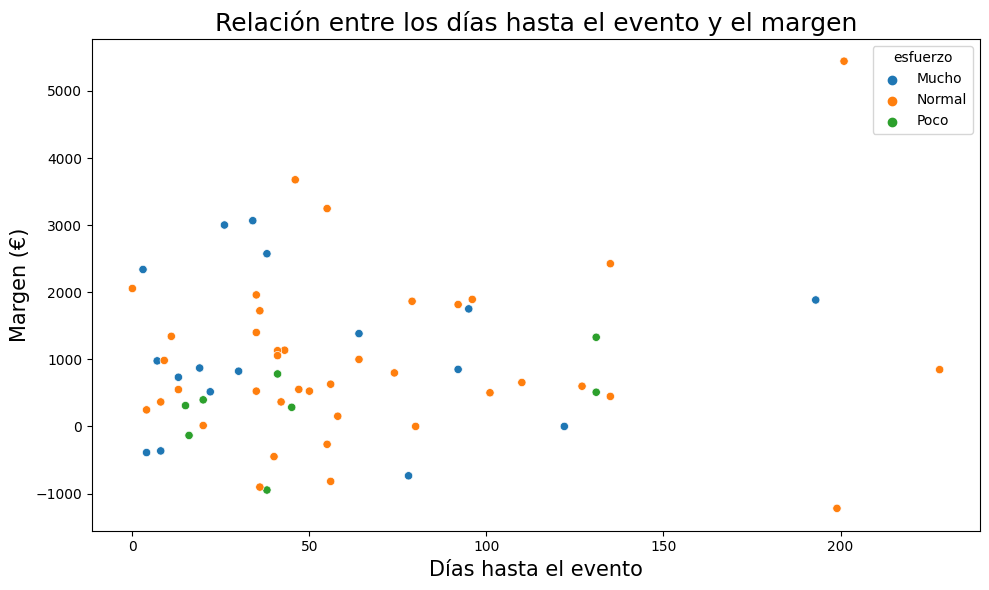

In [719]:
# Crear un gráfico de dispersión para analizar la relación entre los días hasta el evento y el margen
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_vsp, x='dias_hasta_evento', y='margen', color='blue', hue = "esfuerzo")

# Mejorar la visualización
plt.xlabel('Días hasta el evento', size=15)
plt.ylabel('Margen (€)', size=15)
plt.title('Relación entre los días hasta el evento y el margen', size=18)
plt.tight_layout()
plt.show()


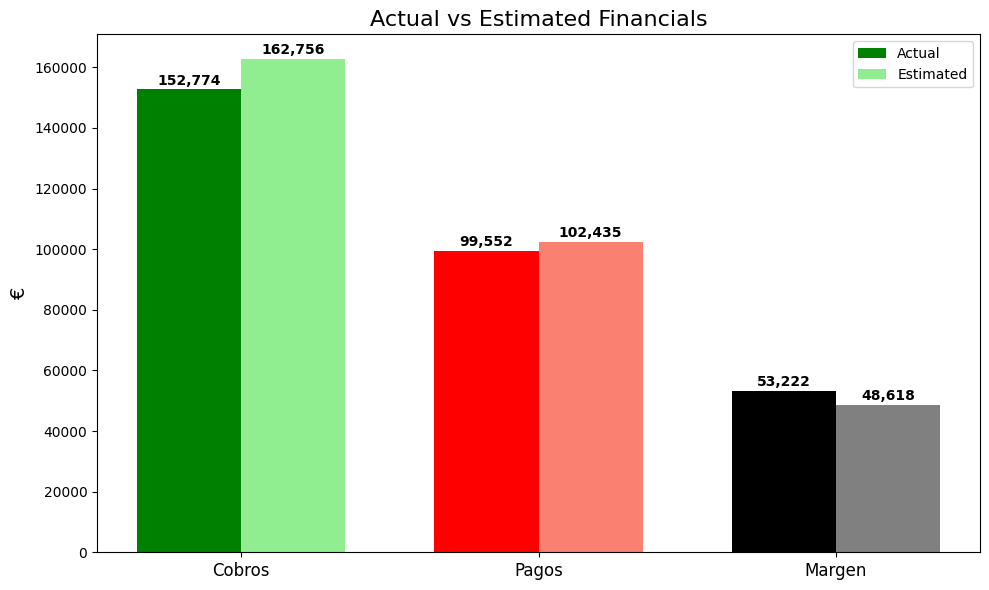

In [721]:
import matplotlib.pyplot as plt
import numpy as np

# Define the categories
categories = ['Cobros', 'Pagos', 'Margen']

# Get actual and estimated values
actual_values = [
    data_vsp['cobros'].sum(),
    data_vsp['pagos'].sum(),
    data_vsp['margen'].sum()
]

estimated_values = [
    data_vsp['ingreso_est_eur'].sum(),
    data_vsp['gasto_est_eur'].sum(),
    data_vsp['margen_est_eur'].sum()
]

# Define bar positions
x = np.arange(len(categories))
width = 0.35  # Width of the bars

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bars1 = ax.bar(x - width/2, actual_values, width, label='Actual', color=['green', 'red', 'black'])
bars2 = ax.bar(x + width/2, estimated_values, width, label='Estimated', color=['lightgreen', 'salmon', 'gray'])

# Labels and title
ax.set_ylabel('€', fontsize=14)
ax.set_title('Actual vs Estimated Financials', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend()

# Add annotations on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 500, f'{height:,.0f}', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()


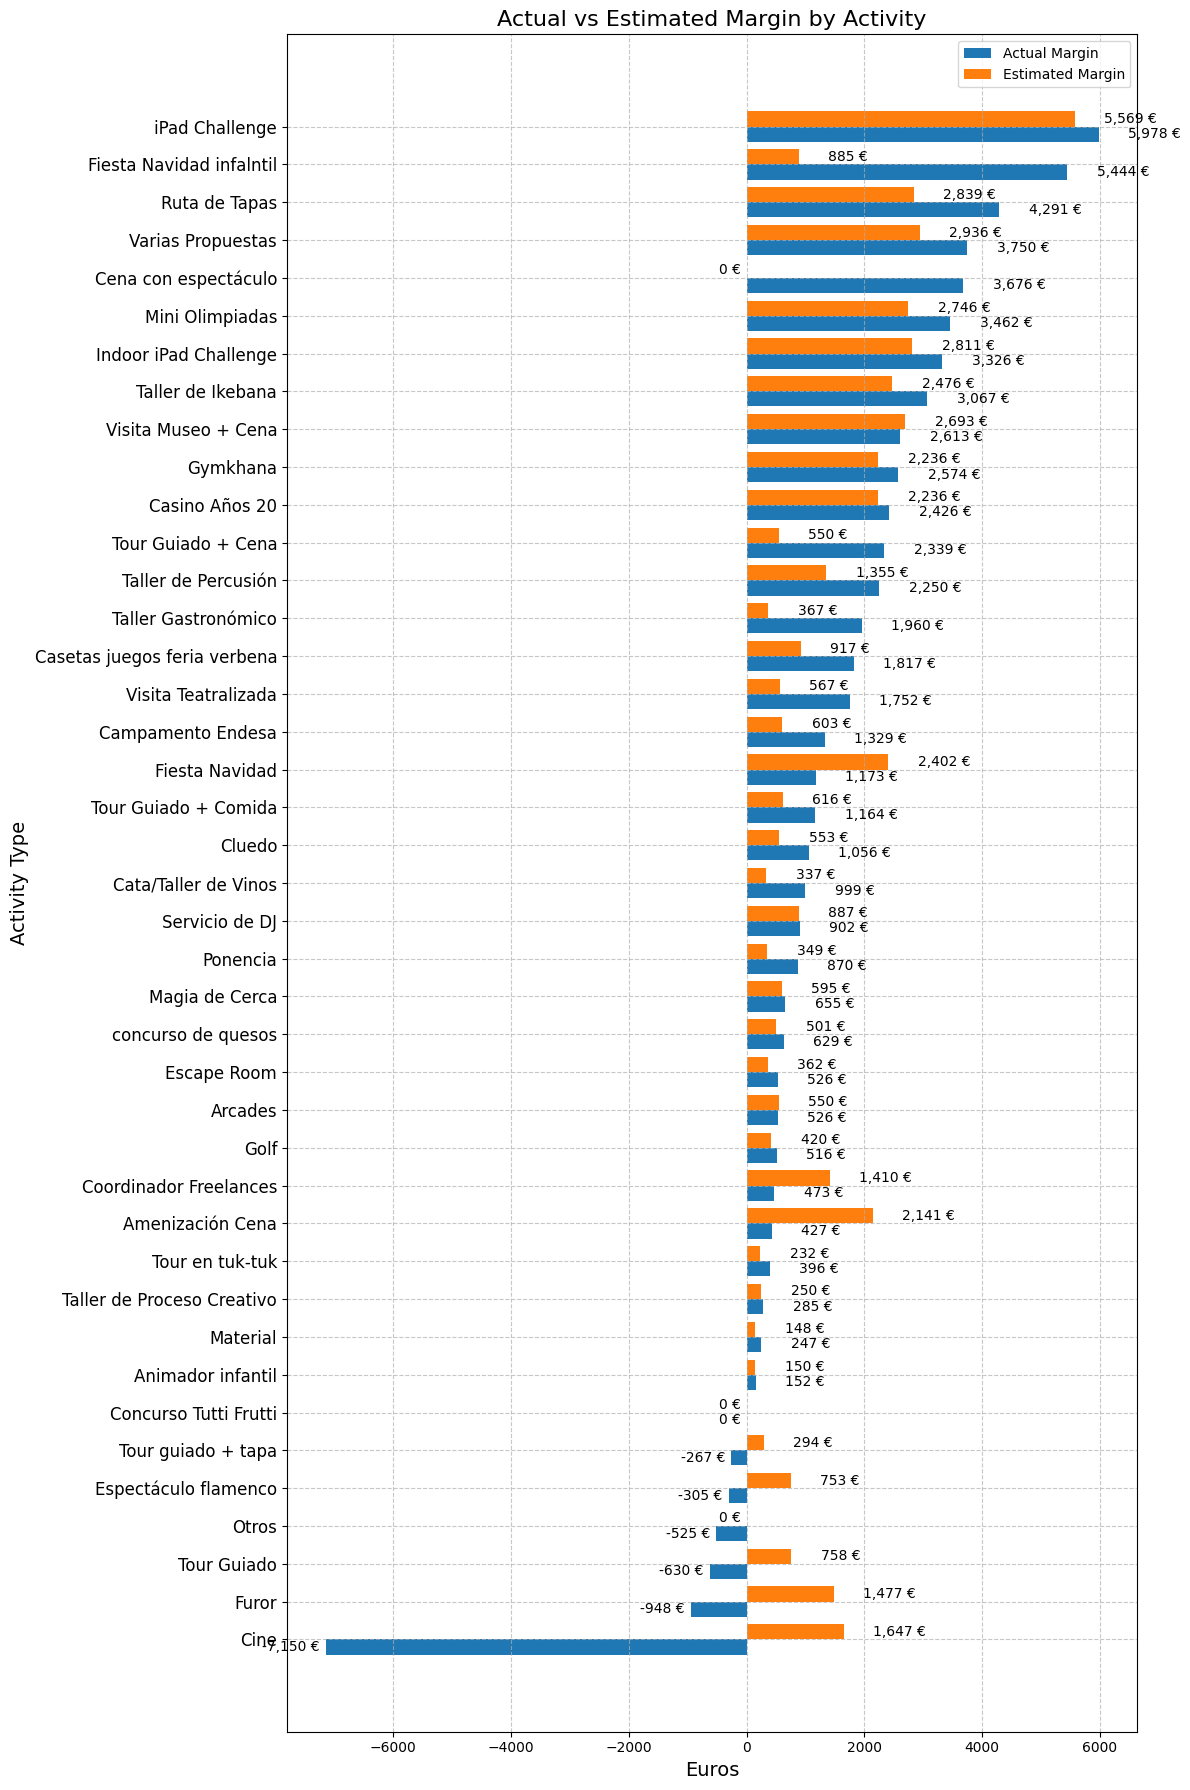

In [757]:
import matplotlib.pyplot as plt
import numpy as np

# Group by activity and sum margins
actividad_summary = data_vsp.groupby('tipo_actividad')[['margen', 'margen_est_eur']].sum()

# Sort by actual margin (ascending for horizontal bars)
actividad_summary = actividad_summary.sort_values(by='margen', ascending=True)

# Define custom positions with extra spacing
n = len(actividad_summary)
y_pos = np.arange(n) * 3  # Creates space between each activity group

# Define bar width
bar_width = 1.2  

# Create figure
fig, ax = plt.subplots(figsize=(12, 18))

# Plot bars (Actual vs Estimated)
bars1 = ax.barh(y_pos - bar_width/2, actividad_summary['margen'], bar_width, label='Actual Margin', color='#1f77b4')  # Blue
bars2 = ax.barh(y_pos + bar_width/2, actividad_summary['margen_est_eur'], bar_width, label='Estimated Margin', color='#ff7f0e')  # Orange

# Labels and title
ax.set_ylabel('Activity Type', fontsize=14)
ax.set_xlabel('Euros', fontsize=14)
ax.set_title('Actual vs Estimated Margin by Activity', fontsize=16)

# Set y-ticks with spacing
ax.set_yticks(y_pos)
ax.set_yticklabels(actividad_summary.index, fontsize=12)

# Add grid
ax.grid(axis="x", linestyle="--", alpha=0.7)
ax.grid(axis="y", linestyle="--", alpha=0.7)


# Add annotations on bars
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 500 if width > 0 else width - 100,  # Adjust position dynamically
                bar.get_y() + bar.get_height() / 2, 
                f'{width:,.0f} €', ha='left' if width > 0 else 'right', va='center', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.legend()
plt.show()
